## IO and GUI
Graphical user interface（簡稱GUI）稱為圖形使用者介面

In [1]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/PeiYu/Desktop/Compute_Vision/275725.jpg')
plt.imshow(img)

cv2.imread 在讀取圖片時，可以在第二個參數指定圖片的格式，可用的選項有三種：<br>
<b>cv2.IMREAD_COLOR</b><br>
　此為預設值，這種格式會讀取 RGB 三個 channels 的彩色圖片，而忽略透明度的 channel。<br>
<b>cv2.IMREAD_GRAYSCALE</b><br>
　以灰階的格式來讀取圖片。<br>
<b>cv2.IMREAD_UNCHANGED</b><br>
　讀取圖片中所有的 channels，包含透明度的 channel。

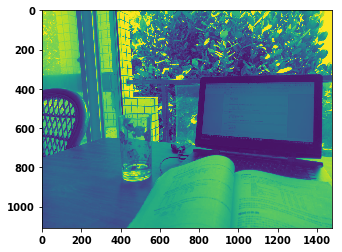

In [2]:
img_gra = cv2.imread('C:/Users/PeiYu/Desktop/Compute_Vision/275725.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gra)

### Resizing and Flipping

#### resizing
<b>resize(InputArray src, Size dsize, OutputArray dst, double fx=0, double fy=0, interpolation=INTER_LINEAR )</b><br>
<b>src：</b>輸入，原圖像<br>
<b>dst：</b>輸出，改變大小之後的圖像，這個圖像和原圖像具有相同的內容，只是大小和原圖像不一樣<br>
<b>dsize：</b>輸出圖像的大小。如果這個參數不為0，那麼就代表將原圖像縮放到這個Size(width，height)指定的大小；<br>
　　　　如果這個參數為0，那麼原圖像縮放之後的大小就要通過下面的公式來計算：<br>
　　　　dsize =大小（round（fx * src.cols），round（fy * src.rows））<br>
　　　　其中，fx和fy就是下面要說的兩個參數，是圖像width方向和height方向的縮放比例。<br>
<b>fx：</b>width方向的縮放比例，如果它是0，那麼它就會按照(double)dsize.width/src.cols來計算；<br>
<b>fy：</b>height方向的縮放比例，如果它是0，那麼它就會按照(double)dsize.height/src.rows來計算；<br>

　(dsize和fx/fy不能同時為0，可指定好dsize的值，讓fx和fy空置直接使用默認值，或是讓dsize為0並指定好fx和fy的值，比如fx=fy=0.5，那麼就相當於把原圖兩個方向縮小一倍！)

<b>interpolation：</b>這個是指定插值的方式，圖像縮放之後，就靠這個參數來指定重新計算像素的方式，有以下幾種：

　INTER_NEAREST -最鄰近插值<br>
　INTER_LINEAR -雙線性插值，如果最後一個參數你不指定，默認使用這種方法<br>
　INTER_AREA -區域插值resampling using pixel area relation. when the image is zoomed, it is similar to the INTER_NEAREST method. <br>
　INTER_CUBIC - 4x4像素鄰域內的雙立方插值<br>
　INTER_LANCZOS4 - 8x8像素鄰域內的Lanczos插值<br>

　縮小圖像通常使用cv :: INTER_AREA  插值看起來最佳<br>
　放大圖像時通常使用cv :: INTER_CUBIC（慢） INTER_LINEAR（更快但看起來還不錯）看起來最佳。

original image shape:  (1108, 1477, 3)


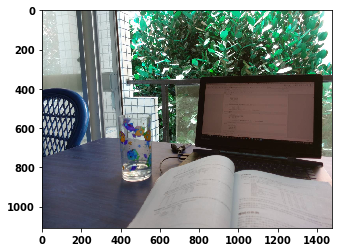

In [3]:
print('original image shape: ',img.shape)
plt.imshow(img)
# (高度, 寬度, 維度(顏色))

resized to 256x256 image shape:  (1108, 1477, 3)


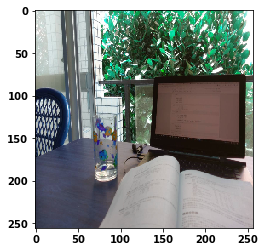

In [4]:
# set target size (width, height) as the second parameter
width, height = 256, 256
resized_img = cv2.resize(img, (width, height))
print('resized to 256x256 image shape: ',img.shape)
plt.imshow(resized_img)

image shape:  (554, 369, 3)


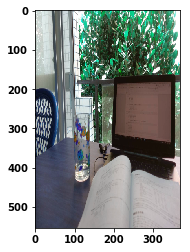

In [5]:
# setting multipliers of image's original width and height
w_mult, h_mult = 0.25, 0.5
resized_img = cv2.resize(img, (0,0), resized_img, w_mult, h_mult)
print('image shape: ',resized_img.shape)
plt.imshow(resized_img)

half sized image shape:  (2216, 5908, 3)


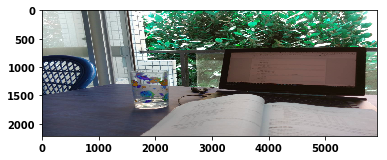

In [6]:
# using INTER_NEAREST interpolation(指定插值)
w_mult, h_mult = 4, 2
resized_img = cv2.resize(img, (0,0), resized_img, w_mult, h_mult, interpolation=cv2.INTER_NEAREST)
print('half sized image shape: ',resized_img.shape)
plt.imshow(resized_img)

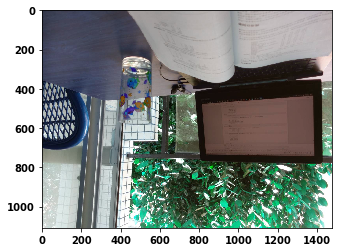

In [7]:
# reflect the image along x-axis
img_flip_along_x = cv2.flip(img,0)
plt.imshow(img_flip_along_x)

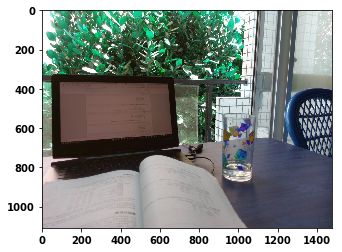

In [8]:
# reflect the image along y-axis
img_flip_along_x = cv2.flip(img,1)
plt.imshow(img_flip_along_x)

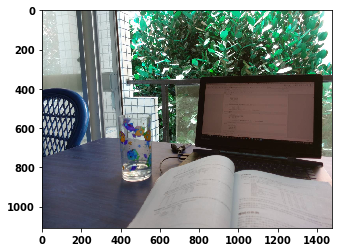

In [9]:
# reflect the image along both x-axis and y-axis
img_flip_along_x = cv2.flip(img,-1)
plt.imshow(img)

### Saving image (lossy、lossless)

In [10]:
# imwrite 可透過圖片的副檔名來指定輸出的圖檔格式
# 輸出圖片檔案時，也可以調整圖片的品質或壓縮率
# 設定 JPEG 圖片品質 [cv2.IMWRITE_JPEG_QUALITY, 90]（可用值為 0 ~ 100）
# 設定 PNG 壓縮層級 [cv2.IMWRITE_PNG_COMPRESSION, 5] （可用值為 0 ~ 9）

# Save image with lower compression-bigger file size but faster
cv2.imwrite('C:/Users/PeiYu/Desktop/Compute_Vision/save_testing.jpg',img, [cv2.IMWRITE_JPEG_QUALITY, 50])
# check the saved one is the same as the original one
saved_img = cv2.imread('C:/Users/PeiYu/Desktop/Compute_Vision/save_testing.jpg')
saved_img.all()==img.all()

True

### cv2.imshow
cv2.waitKey <br>
用來等待與讀取使用者按下的按鍵，而其參數是等待時間（單位為毫秒），若設定為 0 就表示持續等待至使用者按下按鍵為止<br>

cv2.destroyAllWindows <br>
關閉所有 OpenCV 的視窗 <br>

cv2.destroyWindow <br>
加上視窗名稱，關閉指定的視窗 <br>

cv2.namedWindow <br>
可以自由縮放視窗的大小，將視窗設定為 cv2.WINDOW_NORMAL <br>

In [11]:
orig = cv2.imread('C:/Users/PeiYu/Desktop/Compute_Vision/save_testing.jpg')
orig_size = orig.shape[0:2]
orig_size

(1108, 1477)

In [12]:
cv2.imshow("50% Original image", orig)
cv2.waitKey(0)
cv2.destroyAllWindows()

### UI element

#### cv.CreateTrackbar(trackbarName, windowName, value, count, onChange)
<li>trackbarname – Name of the created trackbar.
<li>winname – Name of the window that will be used as a parent of the created trackbar.
<li>value – Optional pointer to an integer variable whose value reflects the position of the slider. Upon creation, the slider position is defined by this variable.
<li>count – Maximal position of the slider. The minimal position is always 0.
<li>onChange – Pointer to the function to be called every time the slider changes position. This function should be prototyped as void Foo(int,void*); , where the first parameter is the trackbar position and the second parameter is the user data (see the next parameter). If the callback is the NULL pointer, no callbacks are called, but only value is updated.
<li>userdata – User data that is passed as is to the callback. It can be used to handle trackbar events without using global variables.


In [10]:
import cv2, numpy as np
cv2.namedWindow('window')

# create variable which contain the fill color values for the image
fill_val = np.array([255,255,255], np.uint8)

# auxiliary function to call from eash trackbar
def trackbar_callback(idx,value):
    fill_val[idx] = value

# Create trackbar into 'window' for each specific color 
cv2.createTrackbar('R','window',0,255, lambda val: trackbar_callback(2,val))
cv2.createTrackbar('G','window',0,255, lambda val: trackbar_callback(1,val))
cv2.createTrackbar('B','window',0,255, lambda val: trackbar_callback(0,val))


while True:
    image = np.full((500,500,3), fill_val)
    image.astype(int)
    cv2.imshow('window',image)
    key = cv2.waitKey(3)
    if key == 27:
        break
cv2.destroyWindow('window')

In [4]:
# auxiliary function to call from eash trackbar
def Change_color(x):
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        fill_val[:] = 0
    else:
        fill_val[:] = [b,g,r]
    cv2.imshow('image',fill_val)
    

# create variable which contain the fill color values for the image
fill_val = np.zeros((180,180,3), np.uint8)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,Change_color)
cv2.createTrackbar('G','image',0,255,Change_color)
cv2.createTrackbar('B','image',0,255,Change_color)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,Change_color)
 
while(1):
 k = cv2.waitKey(1) & 0xFF

 #Abort and exit with 'Q' or ESC 
 if k == 27:
  break
 
cv2.destroyAllWindows()

### Drow Line、Circle、arrowedLine、rectangle、circle、ellipse、text

In [28]:
import cv2, random

#open an image
image = cv2.imread('C:/Users/PeiYu/Desktop/Compute_Vision/275725.jpg')

# get the widgh and hight
w, h = image.shape[1], image.shape[0]

# define function for suppling the point randomly
def rand_pt(mult=1.):
    return (random.randrange(int(w*mult)),
           random.randrange(int(h*mult)))

#cv2.line(影像, 開始座標, 結束座標, 顏色, 線條寬度)
cv2.line(image, rand_pt(), rand_pt(), (85, 255, 85),3)

#cv2.arrowedLine(影像, 開始座標, 結束座標, 顏色, 線條寬度)
cv2.arrowedLine(image, rand_pt(), rand_pt(), (0, 0, 255), 3)

#cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
cv2.rectangle(image, rand_pt(), rand_pt(), (0, 255, 255), 3)
#綠色實心方框
cv2.rectangle(image, rand_pt(), rand_pt(), (0, 255, 0), -1)

#cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度)
cv2.circle(image,rand_pt(), 30, (0, 255, 255), 3)
# 藍色實心圓圈
cv2.circle(image,rand_pt(), 15, (255, 0, 0), -1)

#cv2.ellipse(影像, 中心座標, 軸長, 旋轉角度, 起始角度, 結束角度, 顏色, 線條寬度)
# 傾斜 45 度的紫色橢圓形
cv2.ellipse(image, rand_pt(), (25, 55), 45, 0, 360, (205, 0, 255), 2)

# 傾斜 45 度的半個實心橢圓
cv2.ellipse(image, rand_pt(), (20, 50), 45, 0, 180, (255, 0, 255), -1)


#cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
text = 'OpenCV'
cv2.putText(image, text, rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

OpenCV 所內建的字體很少，如果需要使用到別的字體，可以靠著 PIL 模組，直接從 ttf 字型檔來讀取字體

#### 打字增加圖形

In [33]:
import cv2, random, numpy as np

#open an image
image = cv2.imread('C:/Users/PeiYu/Desktop/Compute_Vision/275725.jpg')

# get the widgh and hight
w, h = image.shape[1], image.shape[0]
image_to_show = np.copy(image)

# define function for suppling the point randomly
def rand_pt():
    return (random.randrange(w),
           random.randrange(h))

gate = False
while not gate:
    cv2.imshow("result", image_to_show)
    key = cv2.waitKey(0)
    if key == ord('c'):
        #cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度)
        cv2.circle(image_to_show,rand_pt(), 30, (0, 255, 255), 3)
    elif key == ord('l'):
        #cv2.line(影像, 開始座標, 結束座標, 顏色, 線條寬度)
        cv2.line(image_to_show, rand_pt(), rand_pt(), (85, 255, 85),3)
    elif key == ord('a'):        
        #cv2.arrowedLine(影像, 開始座標, 結束座標, 顏色, 線條寬度)
        cv2.arrowedLine(image_to_show, rand_pt(), rand_pt(), (0, 0, 255), 3)
    elif key == ord('r'):                
        #cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
        cv2.rectangle(image_to_show, rand_pt(), rand_pt(), (0, 255, 255), 3)
    elif key == ord('e'):
        #cv2.ellipse(影像, 中心座標, 軸長, 旋轉角度, 起始角度, 結束角度, 顏色, 線條寬度)
        # 傾斜 45 度的半個實心橢圓
        cv2.ellipse(image_to_show, rand_pt(), (20, 50), 45, 0, 180, (255, 0, 255), -1)
    elif key == ord('t'):
        #cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
        text = 'OpenCV'
        cv2.putText(image_to_show, text, rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)
    elif key == 27:
        gate = True
cv2.destroyAllWindows()

隨滑鼠點擊增加圖形(P71)

### Capturing and showing frames from a camera (P72)

In [37]:
import cv2
# create VideoCapture
capture = cv2.VideoCapture(0)
while True:
    #Read the frames from the camera using capture.read, which reture a pair
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
    cv2.imshow('frame',frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break
capture.release()
cv2.destroyAllWindows()

Pressed Esc


### Pleying frame stream from video(P81)

In [41]:
import cv2
capture = cv2.VideoCapture('C:/Users/PeiYu/Desktop/Compute_Vision/website_demo.mp4')
while True:
    #Read the frames from the camera using capture.read, which reture a pair
    has_frame, frame = capture.read()
    if not has_frame:
        print('Reached the end of the video')
        break
    cv2.imshow('frame',frame)
    key = cv2.waitKey(50)
    if key == 27:
        print('Pressed Esc')
        break
capture.release()
cv2.destroyAllWindows()

Pressed Esc


### Obtaining a frame stream properties(P86)

In [45]:
import numpy,cv2
def print_capture_properties(*args):
    capture = cv2.VideoCapture(*args)
    print('Created capture: ',''.join(map(str,args)))
    print('Frame count: ',int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width: ',int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height: ',int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate: ',capture.get(cv2.CAP_PROP_FPS))
print_capture_properties('C:/Users/PeiYu/Desktop/Compute_Vision/website_demo.mp4')
print()
print_capture_properties(0)


Created capture:  C:/Users/PeiYu/Desktop/Compute_Vision/website_demo.mp4
Frame count:  5811
Frame width:  1280
Frame height:  720
Frame rate:  29.97002997002997

Created capture:  0
Frame count:  -1
Frame width:  640
Frame height:  480
Frame rate:  0.0


### Writing a frame stream into video(P91)

#### cv2.VideoWriter(filename, fourcc, fps, framesize, isColor)
<b>filename:</b>寫出的視頻文件的名字/路徑<br>
<b>fourcc:</b>寫出視頻的編碼格式<br>
<b>fps:</b>寫出視頻的fps值<br>
<b>framesize:</b>為寫出視頻的畫面大小<br>
<b>isColor:</b>設置寫出視頻是否為彩色視頻，可以省略，默認為彩色

In [74]:
import cv2
capture = cv2.VideoCapture(0)
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Frame width: ',frame_width)
print('Frame height: ',frame_height)

#create a video writer
video = cv2.VideoWriter('C:/Users/PeiYu/Desktop/Compute_Vision/testing.avi',cv2.VideoWriter_fourcc(*'XVID'), 25.0, (frame_width,frame_height))
while True:
    #Read the frames from the camera using capture.read, which reture a pair
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
    video.write(frame)
    cv2.imshow('frame',frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break
capture.release()
cv2.destroyAllWindows()

Frame width:  640
Frame height:  480
Pressed Esc


### Jumping between frames in video files(P96)

In [76]:
import cv2
capture = cv2.VideoCapture('C:/Users/PeiYu/Desktop/Compute_Vision/testing.avi')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count: ', frame_count)

#get total number of frames
print('Position: ', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame0', frame)

#get the next frame
print('Position: ', capture.get(cv2.CAP_PROP_POS_FRAMES))
_, frame = capture.read()
cv2.imshow('frame1', frame)

capture.set(cv2.CAP_PROP_POS_FRAMES, 50)
print('Position: ', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame50', frame)

cv2.waitKey()
cv2.destroyAllWindows()

Frame count:  67
Position:  0
Position:  1.0
Position:  50
